In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.display import display, HTML, Image

from numpy.random import random as np_rand
from mep30_poc import test_grid_arrangement, GridStrategy, SquareStrategy
from plot_helper import display_figures


# The Problem


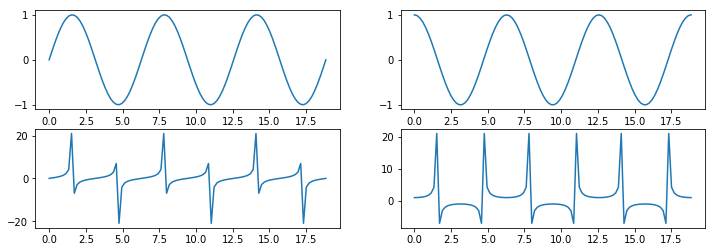

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
fig = plt.figure(figsize=(12, 4))

secant = lambda x: 1 / np.cos(x)
for i, func in zip(range(1, 5), [np.sin, np.cos, np.tan, secant]):
    ax = fig.add_subplot(2, 2, i)
    ax.plot(x, func(x))

plt.show()

# The Problem

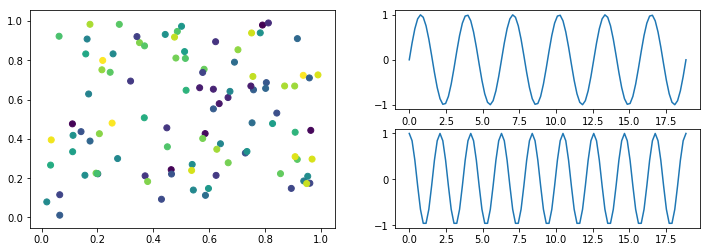

In [4]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 4))

gs1 = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs1[:, 0]); ax1.scatter(np_rand(100), np_rand(100), c=np_rand(100))
ax2 = plt.subplot(gs1[0, 1]); ax2.plot(x, np.sin(2 * x))
ax3 = plt.subplot(gs1[1, 1]); ax3.plot(x, np.cos(3 * x))
plt.show()

# The Problem

In [5]:
def plot_some_stuff(x_list, y_list, c_list, make_subplot_grid):
    assert len(x_list) == len(y_list) == len(c_list)
    N = len(x_list)
    
    axes = make_subplot_grid(N)   # Where does make_subplot_grid come from?
    
    for axis, x, y, c in zip(axes, x_list, y_list, c_list):
        axis.scatter(x, y, c=c)
    
    plt.show()    

In [6]:
def make_data_inputs(N):
    args = []
    for j in range(3):
        args.append([np_rand(100) for i in range(N)])
    
    return tuple(args)

# The Problem

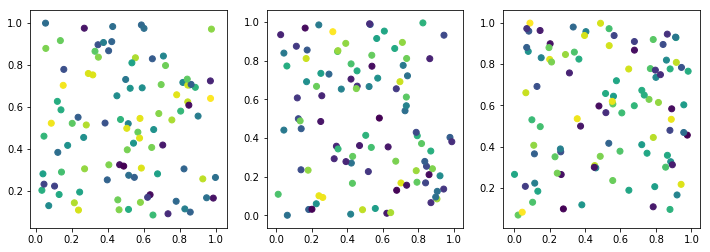

In [7]:
def subplot_grid(N):
    fig = plt.figure(figsize=(12, 4))
    return [fig.add_subplot(1, N, i) for i in range(1, N+1)]

plot_some_stuff(*make_data_inputs(3), subplot_grid)

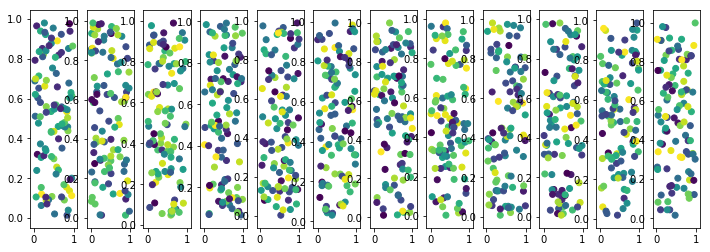

In [8]:
plot_some_stuff(*make_data_inputs(12), subplot_grid)

# Solution: `GridStrategy`



## Goals:

- Provide a mechanism for users to get a grid arrangement as a function of the number of things they want to plot.
- Allow the strategy by which the plots are arranged to be customized.
- Implement the most common strategies in `matplotlib`

### Proof-of-concept base class:
```python
class GridStrategy(metaclass=ABCMeta):
    """
    Static class used to compute grid arrangements given the number of subplots
    you want to show. By default, it goes for a symmetrical arrangement that is
    nearly square (nearly equal in both dimensions).
    """
    def get_grid(self, n):
        """  Return a list of axes designed according to the strategy. """
        grid_arrangement = self.get_grid_arrangement(n)
        return self.get_gridspec(grid_arrangement)
    
    @classmethod
    @abstractmethod
    def get_grid_arrangement(cls, n):
        pass
    
    def get_gridspec(self, grid_arrangement):
        ...  # (implementation goes here)
```

# Example: `RectangularStrategy`

In [9]:
class RectangularStrategy(GridStrategy):
    """Provide a nearest-to-square rectangular grid."""

    @classmethod
    def get_grid_arrangement(cls, n):
        """
        Retrieves the grid arrangement that is the nearest-to-square rectangular
        arrangement of plots.
        """
        # May not work for very large n because of the float sqrt
        # Get the two closest factors (may have problems for very large n)
        step = 2 if n % 2 else 1
        for i in range(int(np.sqrt(n)), 0, -step):
            if n % i == 0:
                x, y = n // i, i
                break
        else:
            x, y = n, 1

        # Convert this into a grid arrangement
        return tuple(x for i in range(y))

# Example: `RectangularStrategy`

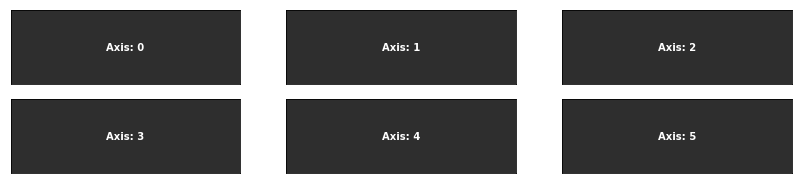

In [10]:
test_grid_arrangement(6, RectangularStrategy(), figsize=(14, 3))

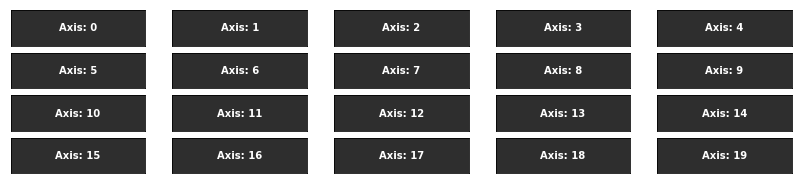

In [11]:
test_grid_arrangement(20, RectangularStrategy(), figsize=(14, 3))

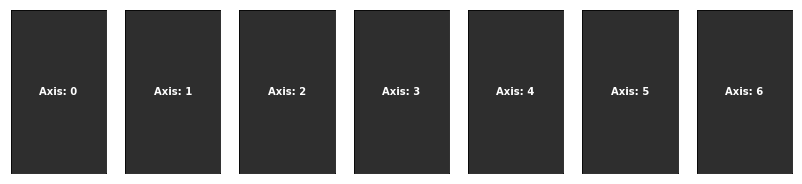

In [12]:
test_grid_arrangement(7, RectangularStrategy(), figsize=(14, 3))

# Example: `SquareStrategy`

In [13]:
figures = [test_grid_arrangement(n, SquareStrategy(), figsize=(7, 4)) for n in (7, 37)]
display_figures(*figures)

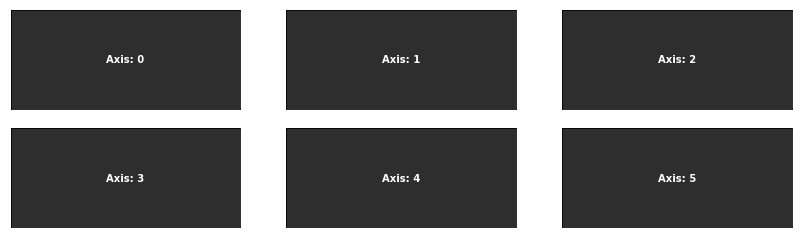

In [14]:
test_grid_arrangement(6, SquareStrategy())

# Example: `SquareStrategy`

In [15]:
figures = [test_grid_arrangement(7, SquareStrategy(alignment=align), figsize=(5, 12))
           for align in ('left', 'center', 'right')]
display_figures(*figures)

# Next stage

**MEP**: https://github.com/matplotlib/matplotlib/wiki (Navigate to [MEP 30](https://github.com/matplotlib/matplotlib/wiki/MEP30%3A-Grid-population-strategies))
<br/><br/><br/>
**[Issue #8997](https://github.com/matplotlib/matplotlib/issues/8997)** for discussion
<br/><br/><br/>
**Implementation**
  - API design - implement proof of concept in matplotlib
  - Decide what strategies should be included on first release
  - Provide `pyplot`-style functions.